In [77]:
import matplotlib.pyplot as plt
import json
import numpy as np

from src.data_models.positional.waypoint import Waypoint, Waypoints
from src.waypoint_generation.waypoint_factory import WaypointFactory, WaypointAlgorithmEnum

In [82]:
with open("algorithms_output.json", 'r') as f:
    data = json.loads(json.load(f))
    
img = np.array(data['img'])

algs = {}
for key in WaypointAlgorithmEnum:
    key = str(key)
    try:        
        wps = Waypoints(data[key]['wps'])        
        algs[key] = {}
        algs[key]['time'] = data[key]['time']
        algs[key]['wps'] = wps
        print(f"{key} does exist ({len(wps)} wps)")
    except KeyError:
        print(f"{key} doesn't exist")

WaypointAlgorithmEnum.LHC_GW_CONV_E doesn't exist
WaypointAlgorithmEnum.PARALLEL_SWATHS does exist (27 wps)
WaypointAlgorithmEnum.MODIFIED_LAWNMOWER doesn't exist
WaypointAlgorithmEnum.CONSTANT_SPEED does exist (5 wps)
WaypointAlgorithmEnum.NONE doesn't exist


WaypointAlgorithmEnum.LHC_GW_CONV_E
223.94 units long
70.67s


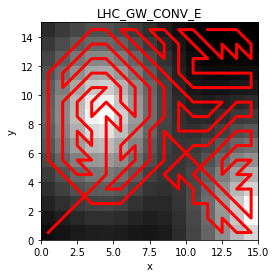

WaypointAlgorithmEnum.PARALLEL_SWATHS
2400.00 units long
0.01s


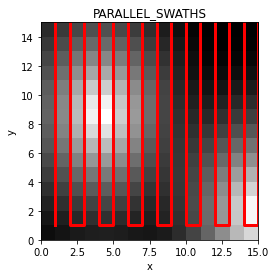

WaypointAlgorithmEnum.MODIFIED_LAWNMOWER
259.41 units long
547.07s


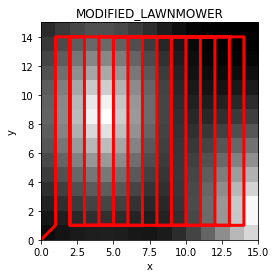

In [80]:
def plot(alg):
    fig, ax = plt.subplots()
    
    ax.imshow(img, interpolation=None,origin='bottom', extent=[0, img.shape[0], 0, img.shape[1]], cmap='gray')
    wps = algs[str(alg)]['wps'].toNumpyArray()
    
    dist = np.sum(np.linalg.norm(wps[1:] - wps[:-1],axis=1))
    
    
    
    ax.plot(wps[:,0],wps[:,1],'r',linewidth=3)
        
    ax.set_xlim(0,img.shape[0])
    ax.set_ylim(0,img.shape[1])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    s = str(alg).split('.')[1]
    ax.set_title(s)
    
    return fig,ax,dist
    
    
for key in algs.keys():
    fig,ax,dist = plot(key)
    print(f"{key}\n{dist:.2f} units long\n{algs[key]['time']:.2f}s")
    plt.show()